# after_stat

In [1]:
import pandas as pd

from plotnine import ggplot, aes, after_stat, geom_bar, labs

### after_stat

`geom_bar` uses `stat_count` which by default maps the `y` aesthetic to
the `count` which is the number of observations at a position.

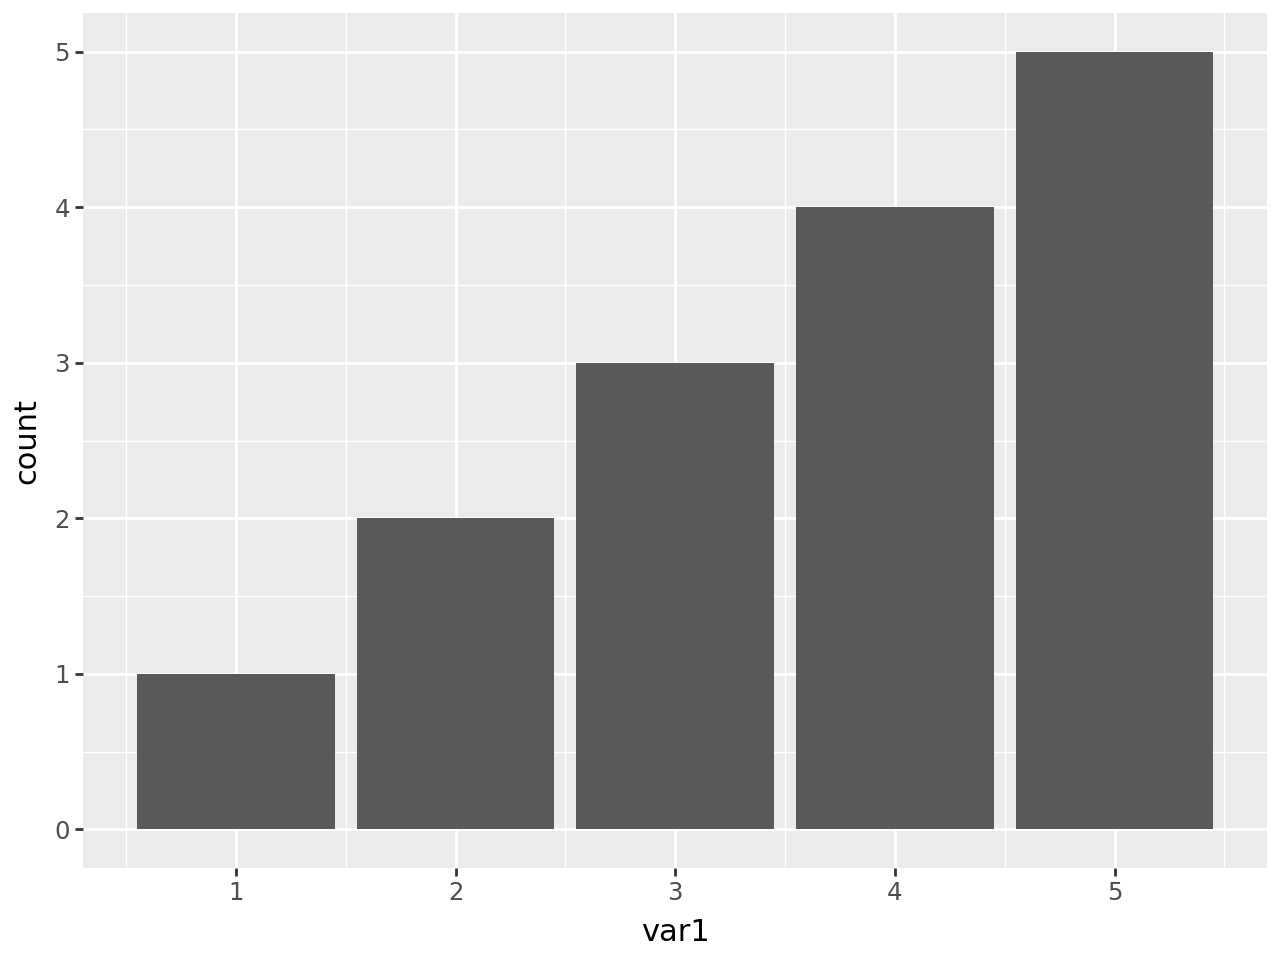

In [2]:
df = pd.DataFrame({
    "var1": [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]
})

(
    ggplot(df, aes("var1"))
    + geom_bar()
)

Using the `after_stat` function, we can instead map to the `prop` which
is the ratio of points in the panel at a position.

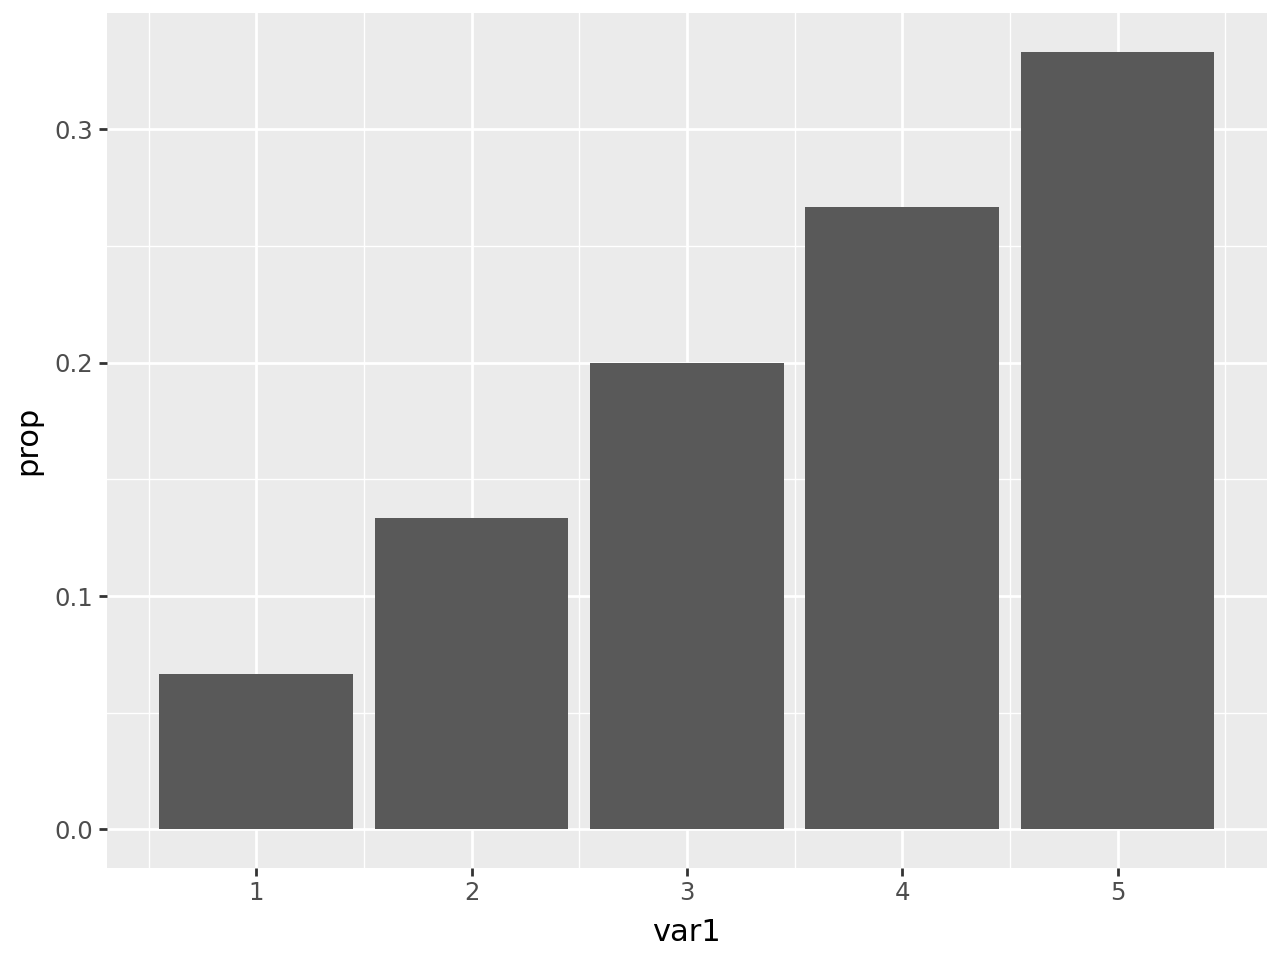

In [3]:
(
    ggplot(df, aes("var1"))
    + geom_bar(aes(y=after_stat("prop")))  # default is after_stat('count')
)

With `after_stat` you can used the variables calculated by the stat in
expressions. For example we use the `count` to calculated the `prop`.

In [4]:
(
    ggplot(df, aes("var1"))
    + geom_bar(aes(y=after_stat("count / np.sum(count)")))
    + labs(y="prop")
)

By default `geom_bar` uses `stat_count` to compute a frequency table
with the `x` aesthetic as the key column. As a result, any mapping
(other than the `x` aesthetic is lost) to a continuous variable is lost
(if you have a classroom and you compute a frequency table of the
gender, you lose any other information like height of students).

For example, below `fill='var1'` has no effect, but the `var1` variable
has not been lost it has been turned into `x` aesthetic.

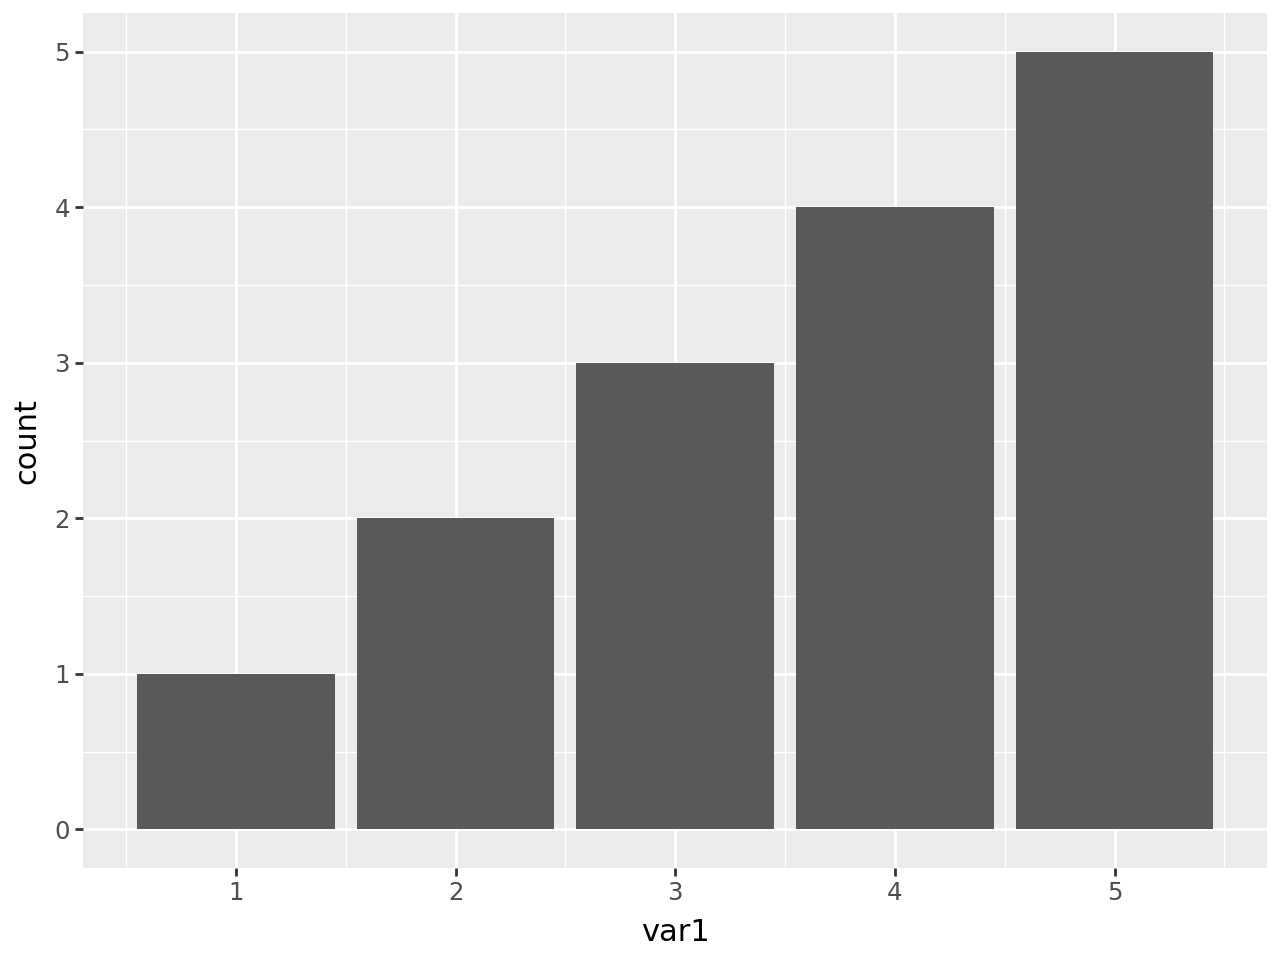

In [5]:
(ggplot(df, aes("var1")) + geom_bar(aes(fill="var1")))

We use `after_stat` to map `fill` to the `x` aesthetic after it has been
computed.

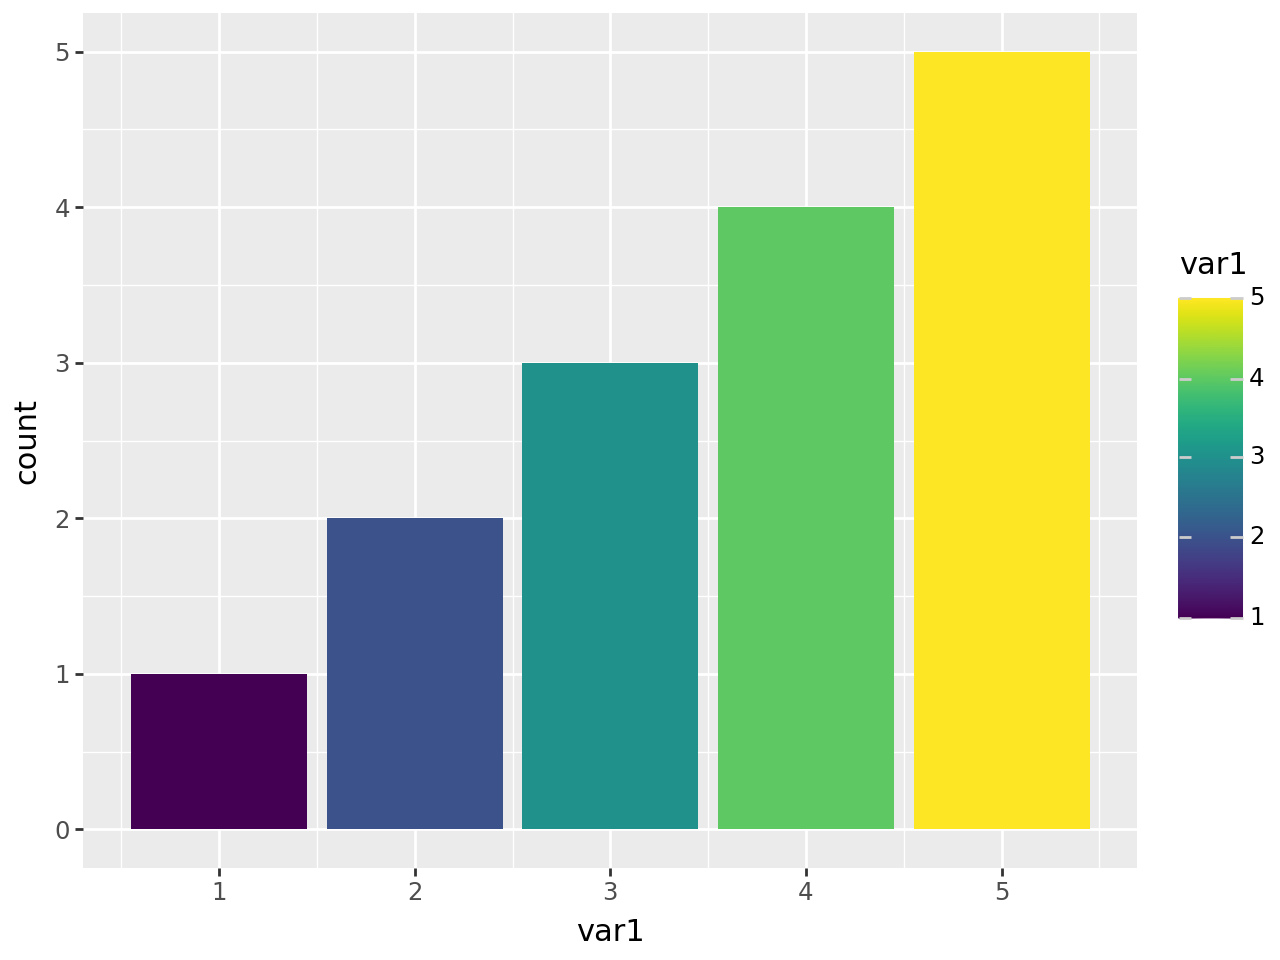

In [6]:
(
    ggplot(df, aes("var1"))
    + geom_bar(aes(fill=after_stat("x")))
    + labs(fill="var1")
)